## In a completely random distribution, using mean is good option?

When following a normal distribution, the using mean method is a good way to lower the RMSE.

Is this also true when following other distributions?

I would guess that in any distribution, the using mean minimizes the RMSE and makes the RMSE a standard deviation.

In [8]:
def ternary_search_rmse_min(arr):
    # search best rmse. O(log(n))
    def check(x):
        sum_sq = 0
        for val in arr:
            sum_sq += (val - x) ** 2
        sum_sq /= len(arr)
        return sum_sq**0.5

    lo = -10
    hi = 10
    while abs(lo-hi) >= 1e-5:
        c1 = (lo*2 + hi) / 3
        c2 = (lo + hi*2) / 3
        rmse1 = check(c1)
        rmse2 = check(c2)
        if rmse1 < rmse2:
            hi = c2
        else:
            lo = c1
    return lo, check(lo)

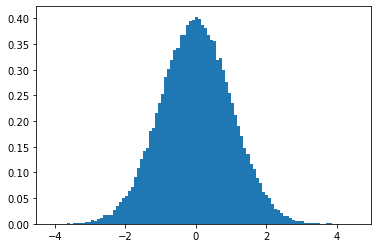

In [2]:
# normal distribution
import numpy as np
import matplotlib.pyplot as plt

x = np.random.normal(0, 1, 10**5)
y = np.random.normal(0, 1, 10**5)
count, bins, ignored = plt.hist(x, 100, density=True, align='mid')
plt.show()

In [3]:
sum_sq = 0
for xx, yy in zip(x, y):
    sum_sq += (xx - yy) ** 2
sum_sq /= len(x)
print(sum_sq**0.5)

1.412429311083195


In [9]:
ternary_search_rmse_min(x)

(0.003500318316721728, 0.9996972529810378)

When following a normal distribution, best strategy is using mean. and result is standard deviation

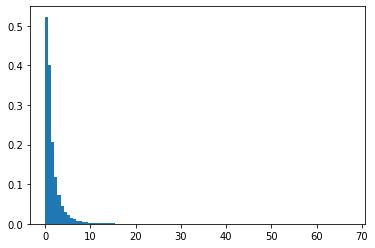

In [10]:
# lognormal distribution
import numpy as np
import matplotlib.pyplot as plt

x = np.random.lognormal(0, 1, 10**5)
count, bins, ignored = plt.hist(x, 100, density=True, align='mid')
plt.show()

In [11]:
display(x.mean())
display(x.std())

1.6457389761767096

2.1435885288990004

In [12]:
ternary_search_rmse_min(x)

(1.6457334524955964, 2.1435885289061254)

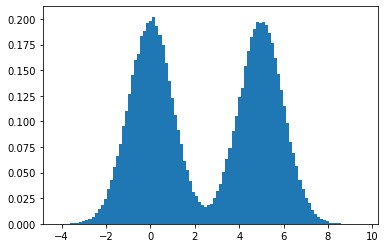

In [16]:
# double normal distribution
import numpy as np
import matplotlib.pyplot as plt

x1 = np.random.normal(0, 1, 10**5)
x2 = np.random.normal(5, 1, 10**5)
x = np.concatenate((x1, x2))
count, bins, ignored = plt.hist(x, 100, density=True, align='mid')
plt.show()

In [17]:
display(x.mean())
display(x.std())

2.4985084007141145

2.6881555359642255

In [18]:
ternary_search_rmse_min(x)

(2.498504946650016, 2.688155535966447)

Apparently, the using mean is best for other distributions, as well as for the normal distribution.